In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift, ifftshift


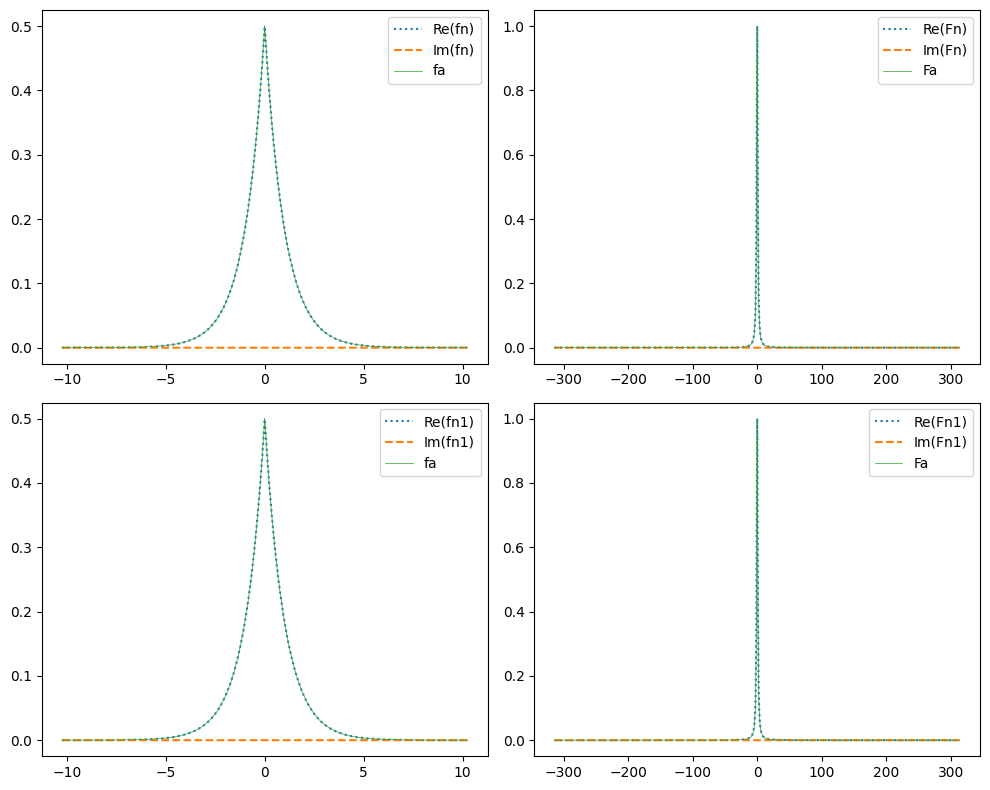

In [22]:
N = 2048
dx = 0.01
Lx = N * dx # Length in real space
dxi = 2 * np.pi / Lx # Nyquist relation
x = np.arange(-N/2, N/2) * dx
xi = np.arange(-N/2, N/2) * dxi

a = 1
fa = a / 2 * np.exp(-a * abs(x)) # Laplace distribution
Fa = a**2 / (a**2 + xi**2) # Lorentzian

Fn  = fftshift(ifft(ifftshift(fa))) * Lx # Forward transform
fn  = fftshift( fft(ifftshift(Fa))) / Lx # Inverse transform recovering pdf
Fn1 = fftshift( fft(ifftshift(fa))) * dx # Forward transform
fn1 = fftshift(ifft(ifftshift(Fa))) / dx # Inverse transform recovering pdf

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0, 0].plot(x, fn.real, ls = "dotted", label = "Re(fn)")
ax[0, 0].plot(x, fn.imag, ls = "--", label = "Im(fn)")
ax[0, 0].plot(x, fa, ls = "-", lw = 0.5, label = "fa")
ax[0, 0].legend()

ax[0, 1].plot(xi, Fn.real, ls = "dotted", label = "Re(Fn)")
ax[0, 1].plot(xi, Fn.imag, ls = "--", label = "Im(Fn)")
ax[0, 1].plot(xi, Fa, ls = "-", lw = 0.5, label = "Fa")
ax[0, 1].legend()

ax[1, 0].plot(x, fn1.real, ls = "dotted", label = "Re(fn1)")
ax[1, 0].plot(x, fn1.imag, ls = "--", label = "Im(fn1)")
ax[1, 0].plot(x, fa, ls = "-", lw = 0.5, label = "fa")
ax[1, 0].legend()

ax[1, 1].plot(xi, Fn1.real, ls = "dotted", label = "Re(Fn1)")
ax[1, 1].plot(xi, Fn1.imag, ls = "--", label = "Im(Fn1)")
ax[1, 1].plot(xi, Fa, ls = "-", lw = 0.5, label = "Fa")
ax[1, 1].legend()

plt.tight_layout()
plt.show()